<img src="./lecture_image/00_title.png">

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[12차시] 학습목표</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>

○ 탬플릿 매칭에 대해 학습한다.
        
○ 허프 변환을 이용하여 직선 및 원을 찾는 방법을 학습한다.       
        
</font></td></tr>   
</table>


# 템플릿 매칭

## where() 함수 테스트

- 해당 조건에 만족하는 값이 있는 인덱스들을 반환

<img src="./lecture_image/12_where.png" width=50%>

In [ ]:
import numpy as np

arr1 = np.arange(2, 10)
loc = np.where(arr1 > 5)
loc

In [ ]:
arr2 = np.array([[3, 5, 7, 4],
                 [6, 7, 2, 3],
                 [2, 4, 8, 5]])

# 값이 5보다 큰 값들의 행과 열인덱스를 튜플로 반환 
loc = np.where(arr2 >= 5)

print(loc)
print("행 인덱스") 
print(loc[0]) 
print("열 인덱스") 
print(loc[1])  

## zip() 함수 테스트

- 동일한 개수를 가진 리스트나 튜플을 같은 위치의 요소들끼리 묶어서 튜플로 만들고, 이를 요소로 하는 리스트를 만듬

<img src="./lecture_image/12_zip.png" width=30%>

In [ ]:
a = zip([0, 1, 2, 3], [4, 5, 6, 7])

for pt in a:
    print(pt)

In [50]:
# arr[A:B:C]의 의미 -> index A 부터 index B 까지 C의 간격으로 배열을 생성
# C가 양수라면 마지막 index까지, C가 음수라면 첫 index까지
arr = range(10) 

print(arr[::2]) # 처음부터 끝까지 두 칸 간격으로
print(arr[1::2]) # index 1 부터 끝까지 두 칸 간격으로 
print(arr[::-1]) # 처음부터 끝까지 -1칸 간격으로 ( == 역순으로) 
print(arr[::-2]) # 처음부터 끝까지 -2칸 간격으로 ( == 역순, 두 칸 간격으로) 
print(arr[3::-1]) # index 3 부터 끝까지 -1칸 간격으로 ( == 역순으로)
print(arr[1:6:2]) # index 1 부터 index 6 까지 두 칸 간격으로 

range(0, 10, 2)
range(1, 10, 2)
range(9, -1, -1)
range(9, -1, -2)
range(3, -1, -1)
range(1, 6, 2)


In [ ]:
# zip(*loc[::-1]) 테스트
import numpy as np

loc = (np.array([0, 1, 2, 3]), np.array([4, 5, 6, 7]))

# 동일한 개수를 가진 리스트나 튜플을 같은 위치의 멤버들끼리 묶어서 
# 튜플로 만든 다음 이를 멤버로 하는 리스트를 만듬
# *loc[::-1] : -1은 loc의 순서를 거꾸로 하여 튜플로 묶고 리스트로 만듬 
#              (x, y 좌표의 순서가 바뀌므로), *는 가변매개변수
for pt in zip(*loc[::-1]):
    print(pt)

## 템플릿 매칭 수행하기

- Templete Matching : 어떤 이미지에서 템플릿 이미지와 매칭되는 부분이 있는지 검색하는 방법
- 사진과 똑같은 부분을 찾는 것

- 동작 방법
  - 템플릿 이미지를 입력 이미지의 좌측 상단에서 시작해서 전체 영역을 스캔
  - 템플릿 이미지와 입력 이미지 간의 유사도 분석을 통해 유사도를 반환

<img src="./lecture_image/12_templete_matching.png" width=50%>

- <font color=red>cv2.matchTemplate(원본이미지, 템플릿이미지, 매칭 방법)</font>
   - 전체 이미지의 블록별로 매칭된 이미지 객체의 매칭도를 반환
   - 매칭 방법
     - cv2.TM_SQDIFF : 템플릿 영상에서 같은 위치에 있는 입력 영상의 부분 영상의 픽셀를 뺀 것을 제곱하여 다 더해서 유사도 비교 
       - 유사하면 0(검정), 유사하지 않으면 255(흰색)을 반환
     - cv2.TM_SQDIFF_NORMED : cv2.TM_SQDIFF를 [0, 1]로 정규화한 것
     - cv2.TM_CCORR : 유사하면 255, 유사하지 않으면 0을 반환
     - cv2.TM_CCORR_NORMED : cv2.TM_CCORR를 정규화한 것
     - cv2.TM_CCOEFF : 밝기 보정 후에 cv2.TM_CCORR 방법을 적용한 것
     - cv2.TM_CCOEFF_NORMED : cv2.TM_CCOEFF를 정규화 한 것 (가장 성능이 우수, 속도가 느림), 완전히 일치하면 1, 역일치하면 -1, 상호연관성이 없으면 0을 반환

(346, 574)


(-0.5, 573.5, 345.5, -0.5)

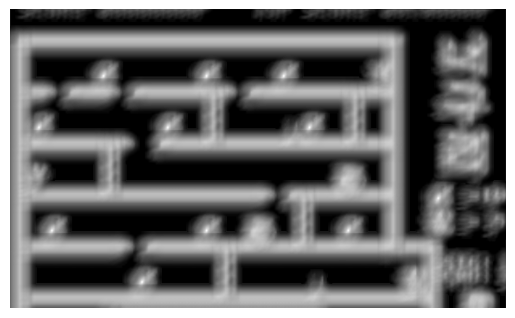

In [51]:
#실습
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./image/game.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

temp = cv2.imread("./image/game_cut.png")
temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
temp_gray = cv2.cvtColor(temp, cv2.COLOR_RGB2GRAY)

# 템플릿 매칭
res = cv2.matchTemplate(img_gray, temp_gray, cv2.TM_CCORR_NORMED)

print(res.shape)

# 매칭 결과 출력
plt.imshow(res, cmap="gray")
plt.axis("off")

- 매칭률이 높을수록 하얀색!

(-0.5, 595.5, 370.5, -0.5)

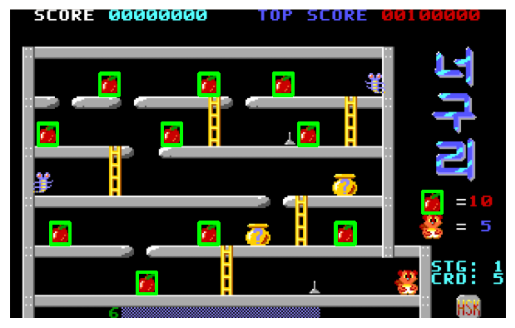

In [52]:
#실습

import matplotlib.pyplot as plt
import numpy as np

# 매칭율이 70% 이상인 이미지의 위치를 반환

loc = np.where(res >= 0.9)

h, w, _ = temp.shape

#검색된 이미지를 표시
for pt in zip(*loc[::-1]) :
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2) 
plt.imshow(img)
plt.axis("off")


<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=3>○ 다른 이미지를 이용하여 템플릿 매칭 수행하기</font></td></tr> 
    <tr><td style="border: 1px solid black; width:600px; height:30px; text-align: center;">
        <img src="./images/crystal.png" width=5%>
        <img src="./lecture_image/12_templete_matching2.png" width=70%></td></tr>   
</table>

# 허프 변환을 이용한 도형 찾기

## 개념

- 허프 변환 (Hough Transform) 
  - 이미지에서 모양을 찾는 가장 유명한 방법
  - 이미지의 형태를 찾거나, 누락되거나 깨진 영역을 복원할 수 있음
  - 직선위의 점을 r과 𝜃로 표현(오른쪽 위 그래프)
  - r-𝜃 그래프에서 만나는 점은 실제 직선이다.
  - 그래프의 교점이 많을 수록 왼쪽의 직선을 대표하는 r, 𝜃
 
- 기본적으로 허프변환은 직선의 방정식을 이용
- 하나의 점을 지나는 무수한 직선의 방적식은 y=ax+b로 표현할 수 있으며, 이것을 삼각함수를 이용하여 변형하면 r = 𝑥 cos 𝜃 + 𝑦 sin 𝜃 으로 표현
- r, 𝜃 평면에서 선들의 교점은 x, y 평면에서 하나의 직선을 의미
- 따라서, r, 𝜃 평면에서 많은 선이 만나는 점을 찾으면 x, y 평면의 직선을 검출할 수 있음

<img src="./lecture_image/12_hough01.png" width=70%>
<img src="./lecture_image/12_hough02.png" width=50%>  

## 직선 찾기

- <font color=red>cv2.HoughLines(image, rho, theta, threshold)</font>
  - image : single-channel binary image, canny edge를 적용한 이미지
  - rho : r 값의 범위 (0 ~ 1 실수)
  - theta : 𝜃 값의 범위(0 ~ 180 정수)
  - threshold : 만나는 점의 기준, 숫자가 작으면 많은 선이 검출되지만 정확도가 떨어지고 숫자가 크면 정확도가 올라감


In [ ]:
#실습

import cv2
import matplotlib.pyplot as plt
import math

img = cv2.imread("./image/chessboard.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# 에지를 검출하고 에지 이미지에서 선을 검출
dst = cv2.Canny(img_gray, 150, 200)

# 선 검출
lines = cv2.HoughLines(dst, 1, np.pi/180, 200)

# 검출된 선을 그린다.
if lines is not None :
    # 검색된 선의 수 만큼 반복
    for i in range(0, len(lines)) :
        # [0][0] : 가장 가능성이 높은 각도와 길이를 가져온다.(자동 정렬이 되어서 첫번째 것이 가장 잘 맞는 것!)
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        
        # 시작점과 끝점을 그리기 위해서 x, y 축의 삼각비를 계산
        tx = math.cos(theta)
        ty = math.sin(theta)
        
        # 기준 좌표 출력
        x0 = rho * tx
        y0 = rho * ty
        
        # 기준 좌표를 이용해서 선의 시작점과 끝점을 계산
        # 충분히 선을 길게 표시하기 위한 값
        d = 1500
        x1 = int(x0 + d * (-ty))
        y1 = int(y0 + d * (tx))
        x2 = int(x0 - d * (-ty))
        y2 = int(y0 - d * (tx))
        
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 3, cv2.LINE_AA)

plt.imshow(img)
plt.axis("off")

## 동영상에서 직선 찾기

In [ ]:
#실습
import cv2
import matplotlib.pyplot as plt
import math
import numpy as np

cap = cv2.VideoCapture("./image/load_oper.mp4")

while True :
    ret, frame = cap.read()
    
    if not ret :
        break
        cap.release()
        cv2.destroyAllWindows()
        
    # 이미지 크기 변환
    frame = cv2.resize(frame, (640, 360))
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    
    
    # 에지 검출
    dst = cv2.Canny(frame_gray, 150, 200)
    
    lines = cv2.HoughLines(dst, 1, np.pi/180, 140)
    
    # 이전 프레임 정보
    pre_ty = 0
    
    if lines is not None :
        for i in range(0, len(lines)) :
            # [0][0] : 가장 가능성이 높은 각도와 길이를 가져온다.
            rho = lines[i][0][0]
            theta = lines[i][0][1]

            # 시작점과 끝점을 그리기 위해서 x, y 축의 삼각비를 계산
            tx = math.cos(theta)
            ty = math.sin(theta)
            
            # 기울기가 0.5이하이거나 (가로선에 가까운 선)
            # 이전 선과 차이가 0.4이하인 것 (유사한 선)은 선을 그리지 않게 함
            if np.abs(tx) < 0.5  or np.abs(pre_ty - ty) < 0.4 :
                continue
                
            pre_ty = ty
            
            # 기준 좌표 출력
            x0 = rho * tx
            y0 = rho * ty

            # 기준 좌표를 이용해서 선의 시작점과 끝점을 계산
            # 충분히 선을 길게 표시하기 위한 값
            d = 1000
            x1 = int(x0 + d * (-ty))
            y1 = int(y0 + d * (tx))
            x2 = int(x0 - d * (-ty))
            y2 = int(y0 - d * (tx))

            cv2.line(frame, (x1, y1), (x2, y2), (0, 0, 255), 3, cv2.LINE_AA)

    cv2.imshow("line detect", frame)
    
    
    # q라는 키를 누른 경우 : 종료
    if cv2.waitKey(33) & 0xFF == ord('q') :
        break
cap.release()
cv2.destroyAllWindows()

## 확률 허프 변환
- <font color=red>cv2.HoughLinesP(image, rho, theta, threshold, minLineLength, maxLineGap)</font>
    - 허프변환은 모든 점에 대해서 계산을 하기 때문에 시간이 많이 소요 
    - 확률 허프 변환 : 모든 픽셀 값을 처리하지 않고 적당히 필요한 만큼 확률적으로 픽셀들을 선택해 연산
  - image : single-channel binary image, canny edge를 적용한 이미지
  - rho : r 값의 범위 (0 ~ 1 실수)
  - theta : 𝜃 값의 범위(0 ~ 180 정수)
  - threshold : 만나는 점의 기준, 숫자가 작으면 많은 선이 검출되지만 정확도가 떨어지고 숫자가 크면 정확도가 올라감
  - minLineLength : 선의 최소 길이. 이 값보다 작으면 선이 아니라고 인식
  - maxLineGap : 선과 선사이의 최대 허용간격. 이 값보다 작으면 하나의 선으로 인식
          - 아주 가까운 선 제거

In [1]:
#실습
import cv2
import matplotlib.pyplot as plt
import math
import numpy as np

cap = cv2.VideoCapture("./image/load_oper.mp4")

while True :
    ret, frame = cap.read()
    
    if not ret :
        break
        cap.release()
        cv2.destroyAllWindows()
        
    # 이미지 크기 변환
    frame = cv2.resize(frame, (640, 360))
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    
    
    # 에지 검출
    dst = cv2.Canny(frame_gray, 150, 200)
    
    # 짧은 선은 무시(80), 가까운 선은 무시(80)
    linesP = cv2.HoughLinesP(dst, 1, np.pi/180, 140, 80, 80)

    if linesP is not None :
        for i in range(0, len(linesP)) :
            # [0] : 가장 가능성이 높은 선을 가져온다.
            # 선의 시작 좌표, 끝좌표(x1, y1, x2, y2)가 반환
            li = linesP[i][0]
            
            # 기울기 계산
            # (x1, y1)과 (x2, y2) 두 점 사이의 기울기 계산
            # 기울기 a = (y2 - y1) / (x2 - x1)
            # 절편 b = y1 - (a * x1)
            a = (li[3] - li[1]) / (li[2] - li[0])
            
            
            # 기울기가 0.5이하이거나 (가로선에 가까운 선)
            # 이전 선과 차이가 0.4이하인 것 (유사한 선)은 선을 그리지 않게 함
            if np.abs(a) < 0.5 :
                continue
                
            cv2.line(frame, (li[0], li[1]), (li[2], li[3]), (0, 0, 255), 3, cv2.LINE_AA)

    cv2.imshow("line detect", frame)
    
    
    # q라는 키를 누른 경우 : 종료
    if cv2.waitKey(33) & 0xFF == ord('q') :
        break
cap.release()
cv2.destroyAllWindows()

## 원 찾기

- <font color=red>cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, minDis, param1, param2, minRadius, maxRadius)</font>
  - cv2.HOUGH_GRADIENT : 원을 찾는 방법
  - 1 : 원이미지와 허프변환 이미지 간의비율 (1로 설정)
  - minDist : 원 중심들 간의 최소 거리 (0보다 커야 함)
  - param1 : Canny 에지 추출자의 maxVal 값
  - parma2 : 허프변환 카운팅 값 (너무 작으면 원하지 않는 많은 원들이 검출됨)
  - minRadius : 원의 최소 반지름
  - maxRadius : 원의 최대 반지름
  
  
- 원리
  - 이미지에서 에지를 계산
  - 에지에 법선을 긋고 (기울기) 직각인 선을 그림
    - 설정한 반지름의 범위에 따라 여러 개의 선을 그림
  - 가장 선이 많이 만나는 점에 해당하는 반지름 크기의 원을 찾음  
  
<img src="./lecture_image/12_hough03.png" width=30%>  

[[[334.5 169.5  37.1]
  [339.5 266.5  37.1]
  [332.5  73.5  39.6]]]


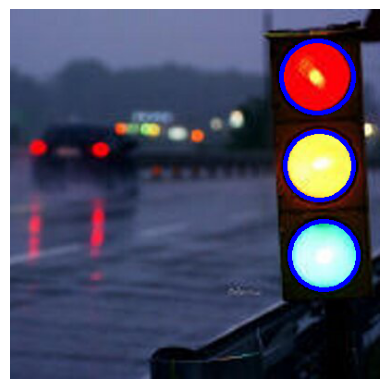

In [16]:
#실습
import cv2
import matplotlib.pyplot as plt
import math

img = cv2.imread("./image/signal_light.jpg", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# 원 찾기
circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, dp=1, minDist=10, param1=60, param2=50, minRadius=10, maxRadius=100)

# 중심점 좌표와 반지름을 반환
print(circles)

if circles is not None :
    
    # 좌표는 정수값이므로 실수를 정수로 변환    
    circle = np.uint16(np.around(circles))
    
    # 원을 그려준다.
    for i in circles[0, :] :
        cv2.circle(img, (i[0], i[1]), i[2], (0, 0, 255), 4)
        
    plt.imshow(img)
    plt.axis("off")

원이 없습니다


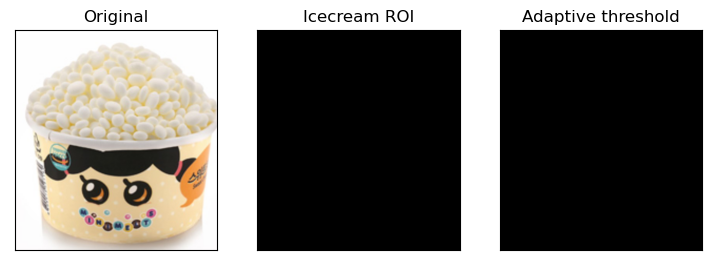

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("./image/icecream3.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 5))
plt.subplot(1, 4, 1)
plt.xticks([]), plt.yticks([])
plt.title("Original")
plt.imshow(img)

# 포도알을 색상으로 검출하기 위해 HSV로 변환
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
# 포도알 부분의 색상, 채도, 명도의 범위 값 설정
lower = np.array([30, 8, 93])
upper = np.array([33, 11, 77])
# HSV 색상으로 변환
mask = cv2.inRange(hsv, lower, upper)
# 포도알 부분만 추출
img2 = cv2.bitwise_and(img, img, mask=mask)
plt.subplot(1, 4, 2)
plt.xticks([]), plt.yticks([])
plt.title("Icecream ROI")
plt.imshow(img2)
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
# 적응형 Threshold 방법을 사용하여 이치화 수행
blk_size = 9        # 블럭 사이즈
C = 3               # 차감 상수
thr1 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                            cv2.THRESH_BINARY_INV, blk_size, C)
plt.subplot(1, 4, 3)
plt.xticks([]), plt.yticks([])
plt.title("Adaptive threshold")
plt.imshow(thr1, cmap="gray")
# 포토알의 중심점 검출
circles = cv2.HoughCircles(thr1, cv2.HOUGH_GRADIENT, dp=1, minDist=30,
                           param1=50, param2=30, minRadius=1,
                           maxRadius=20)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(img, (i[0], i[1]), 20, (255, 0, 0), -1)
    plt.subplot(1, 4, 4)
    plt.xticks([]), plt.yticks([])
    plt.title("Result")
    plt.imshow(img)
else:
    print("원이 없습니다")

[[[ 84.5 121.5  21.7]
  [ 62.5  56.5  19.4]
  [ 33.5 239.5  21.6]
  [438.5 370.5  17.2]
  [489.5 259.5  15. ]
  [431.5 101.5  18.3]
  [122.5 109.5  17.2]
  [390.5  94.5  17.2]]]


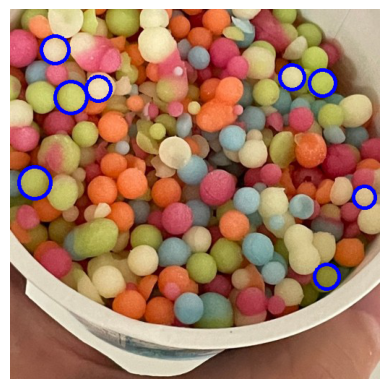

In [30]:
#실습
import cv2
import matplotlib.pyplot as plt
import math

img = cv2.imread("./image/icecream2.png", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# 원 찾기
circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, dp=1, minDist=30, param1=40, param2=50, minRadius=2, maxRadius=30)

# 중심점 좌표와 반지름을 반환
print(circles)

if circles is not None :
    
    # 좌표는 정수값이므로 실수를 정수로 변환    
    circles = np.uint16(np.around(circles))
    
    # 원을 그려준다.
    for i in circles[0, :] :
        cv2.circle(img, (i[0], i[1]), i[2], (0, 0, 255), 4)
        
    plt.imshow(img)
    plt.axis("off")

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=3>○ 포도송이 위치 분석하기</font></td></tr> 
    <tr><td style="border: 1px solid black; width:600px; height:30px; text-align: center;">
        <img src="./lecture_image/12_grape_extract.png" width=70%></td></tr>   
</table>

[[[ 930.5 1772.5   71.6]
  [ 850.5 1361.5   82.6]
  [ 550.5 1354.5   71.3]
  [ 849.5 1889.5   80.5]
  [ 917.5 1499.5   73.9]
  [ 978.5 1264.5   84.8]
  [ 292.5  346.5   95.9]
  [ 826.5 1670.5   77.2]
  [ 279.5  584.5   71.7]
  [1007.5 2047.5   53. ]]]


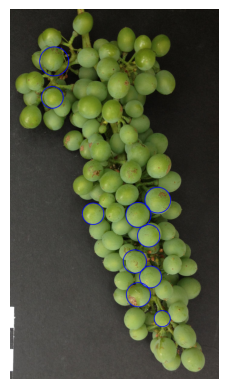

In [49]:
#실습
import cv2
import matplotlib.pyplot as plt
import math

img = cv2.imread("./image/grape.jpg", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# 원 찾기
circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, dp=1, minDist=50, param1=60, param2=50, minRadius=50, maxRadius=135)

# 중심점 좌표와 반지름을 반환
print(circles)

if circles is not None :
    
    # 좌표는 정수값이므로 실수를 정수로 변환    
    circles = np.uint16(np.around(circles))
    
    # 원을 그려준다.
    for i in circles[0, :] :
        cv2.circle(img, (i[0], i[1]), i[2], (0, 0, 255), 4)
        
    plt.imshow(img)
    plt.axis("off")

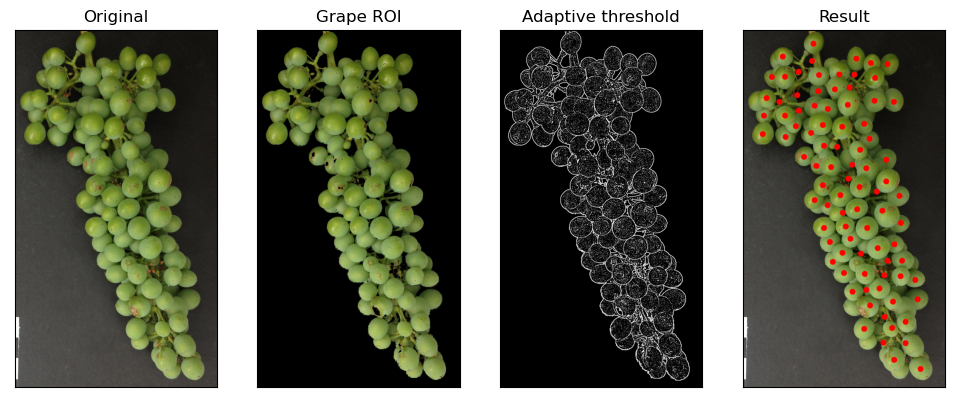

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("./image/grape.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 5))
plt.subplot(1, 4, 1)
plt.xticks([]), plt.yticks([])
plt.title("Original")
plt.imshow(img)

# 포도알을 색상으로 검출하기 위해 HSV로 변환
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
# 포도알 부분의 색상, 채도, 명도의 범위 값 설정
lower = np.array([20, 80, 50])
upper = np.array([90, 255, 255])
# HSV 색상으로 변환
mask = cv2.inRange(hsv, lower, upper)
# 포도알 부분만 추출
img2 = cv2.bitwise_and(img, img, mask=mask)
plt.subplot(1, 4, 2)
plt.xticks([]), plt.yticks([])
plt.title("Grape ROI")
plt.imshow(img2)
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
# 적응형 Threshold 방법을 사용하여 이치화 수행
blk_size = 9        # 블럭 사이즈
C = 3               # 차감 상수
thr1 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                            cv2.THRESH_BINARY_INV, blk_size, C)
plt.subplot(1, 4, 3)
plt.xticks([]), plt.yticks([])
plt.title("Adaptive threshold")
plt.imshow(thr1, cmap="gray")
# 포토알의 중심점 검출
circles = cv2.HoughCircles(thr1, cv2.HOUGH_GRADIENT, dp=1, minDist=90,
                           param1=50, param2=30, minRadius=40,
                           maxRadius=80)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(img, (i[0], i[1]), 20, (255, 0, 0), -1)
    plt.subplot(1, 4, 4)
    plt.xticks([]), plt.yticks([])
    plt.title("Result")
    plt.imshow(img)
else:
    print("원이 없습니다")

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[12차시] 정리하기</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=2>
        
○ Templete Matching : 어떤 이미지에서 템플릿 이미지와 매칭되는 부분이 있는지 검색하는 방법

   - 동작 방법
     - 템플릿 이미지를 입력 이미지의 좌측 상단에서 시작해서 전체 영역을 스캔
     - 템플릿 이미지와 입력 이미지 간의 유사도 분석을 통해 유사도를 반환

  - <font color=red>cv2.matchTemplate(원본이미지, 템플릿이미지, 매칭 방법)</font>

○ 허프 변환 (Hough Transform)
  - 하나의 점을 지나는 무수한 직선의 방적식은 y=mx+c로 표현할 수 있으며, 이것을 삼각함수를 이용하여 변형하면 r = 𝑥 cos 𝜃 + 𝑦 sin 𝜃 으로 표현
  - r, 𝜃 평면에서 선들의 교점은 x, y 평면에서 하나의 직선을 의미
  - 따라서, r, 𝜃 평면에서 많은 선이 만나는 점을 찾으면 x, y 평면의 직선을 검출할 수 있음

        
  - <font color=red>cv2.HoughLines(image, rho, theta, threshold)</font> : 직선 검출

  - <font color=red>cv2.HoughLinesP(image, rho, theta, threshold, minLineLength, maxLineGap)</font> : 확률 허프 변환
    - 모든 픽셀 값을 처리하지 않고 적당히 필요한 만큼 확률적으로 픽셀들을 선택해 연산

  - <font color=red>cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, minDis, param1, param2, minRadius, maxRadius)</font> : 원 찾기           
        
</font></td></tr>   
</table>